In [1]:
# Optimization. Train opimized models over PCA Dataset

In [2]:
# %qtconsole

In [3]:
# imports
import warnings
from sklearn.model_selection import train_test_split
from joblib import load
#
from moduleModelTraining import TrainingMethods
from moduleMetrics import MetricsMethods
from moduleUtilities import UtilityMethods
warnings.filterwarnings(action='ignore')

In [4]:
# class instances
train = TrainingMethods()
evaluate = MetricsMethods()
ut = UtilityMethods()

In [5]:
dataset_to_process = 'smote_pca' # '','smote','smote_pca'
features_to_process = 'auto' # 'manual','auto' ! Remember ! train_models_fs_manual <-> fs_auto different hyperparameters
x_part, y_part = None, None
with open('fragments/'+dataset_to_process+'_x_'+features_to_process+'.joblib', 'rb') as f: x_part = load(f)
with open('fragments/'+dataset_to_process+'_y_'+features_to_process+'.joblib', 'rb') as f: y_part = load(f)

In [6]:
# split of pca_x and smote_y to train test data set
pca_train_x, pca_test_x, pca_train_y, pca_test_y = train_test_split(x_part, y_part, random_state=ut.sd['random_state'],
                                                                    test_size=ut.sd['test_size'], stratify=y_part)

Trained model:  lr_o  accuracy:  95.83
Trained model:  dt_o  accuracy:  93.61
Trained model:  rf_o  accuracy:  97.78
Trained model:  sv_o  accuracy:  100.0
Trained model:  gn_o  accuracy:  95.69
Trained model:  mp_o  accuracy:  100.0
Trained model:  kn_o  accuracy:  95.83
Trained model:  ce_o  accuracy:  97.92
Total training time: 0.34 seconds
Count of label NC (id 2 in Database, 1 in CM) in y_test: 24
Count of label AD-MCI (id 1 in Database, 0 in CM) in y_test: 23 


 Logistic Regression Optimized Scores
accuracy : 95.78% Std.: 5.18%
precision : 100.00% Std.: 0.00%
recall : 91.00% Std.: 11.14%
f1 : 94.92% Std.: 6.30%
make_scorer(custom_specificity) : 100.00% Std.: 0.00%

 Decision Tree Optimized Scores
accuracy : 89.78% Std.: 10.96%
precision : 96.67% Std.: 6.67%
recall : 84.00% Std.: 23.32%
f1 : 87.39% Std.: 15.80%
make_scorer(custom_specificity) : 96.00% Std.: 8.00%

 Random Forest Optimized Scores
accuracy : 97.78% Std.: 4.44%
precision : 100.00% Std.: 0.00%
recall : 96.00% Std.: 8

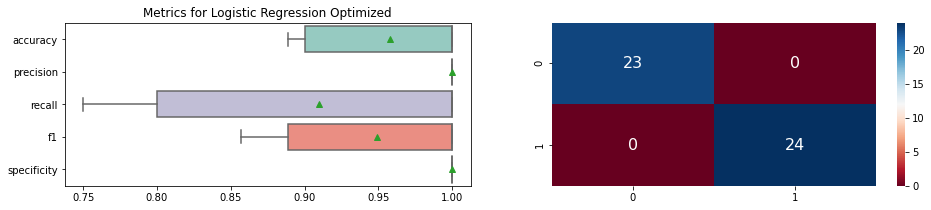

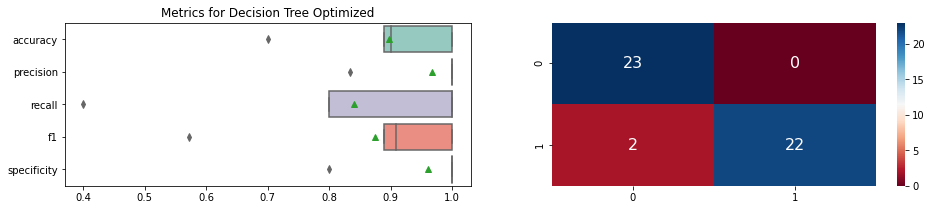

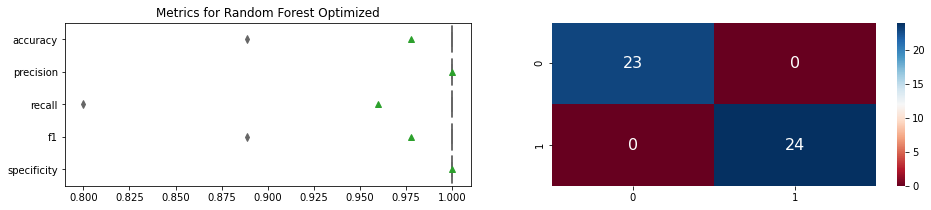

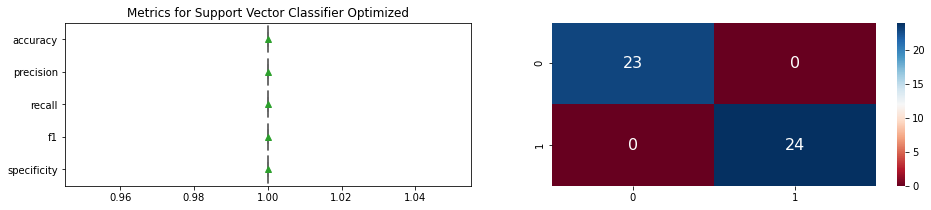

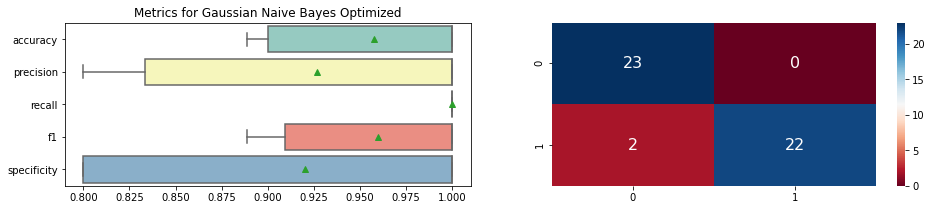

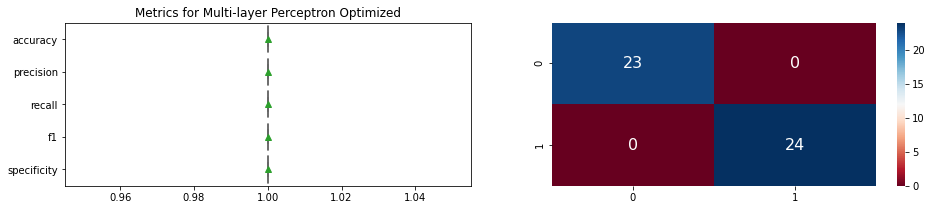

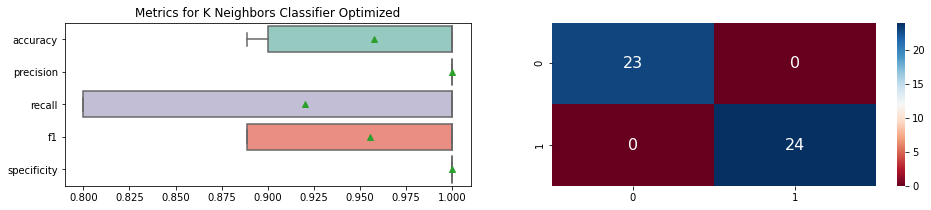

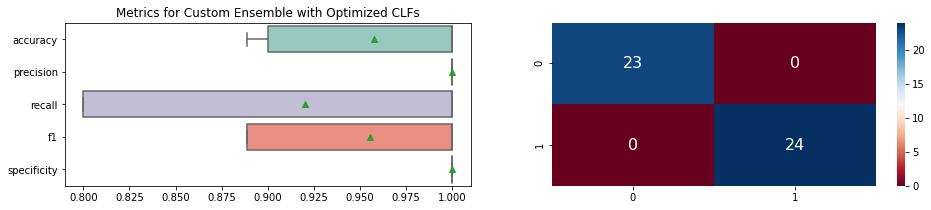

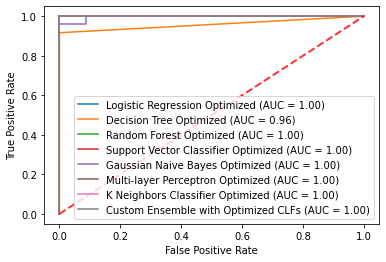

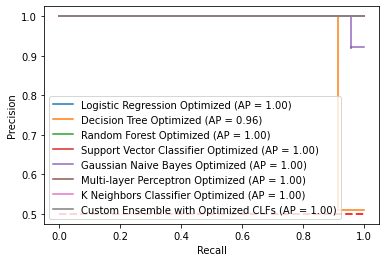

In [7]:
# train and evaluate models using the 2 components from PCA
trained_models_using_pca_comp = train.train_models_fs_auto(pca_train_x, pca_train_y, pca_test_x, pca_test_y)
evaluate.generate_metrics(trained_models_using_pca_comp, pca_test_x, pca_test_y, 
                          ['accuracy', 'precision', 'recall', 'f1', 'specificity'], 
                          cv_num=ut.sd['cv_num'], show_raw_data=True)

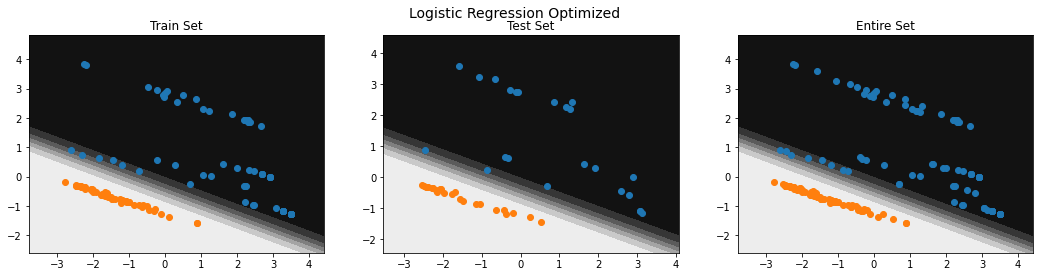

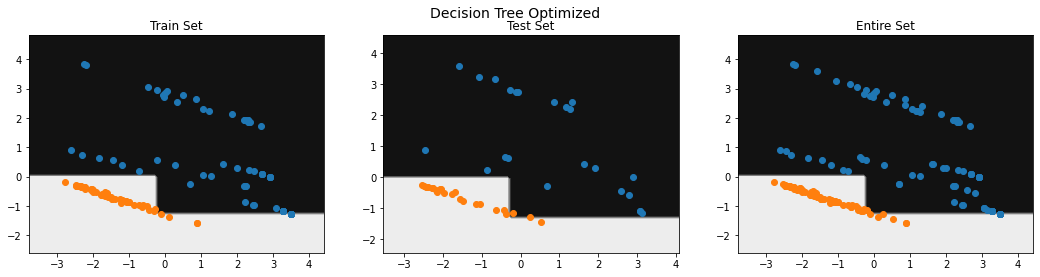

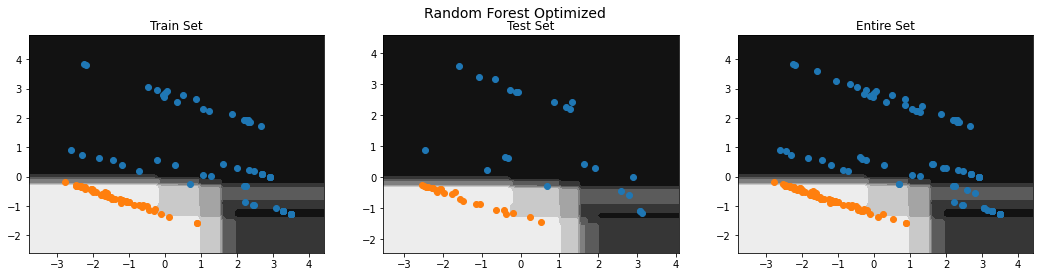

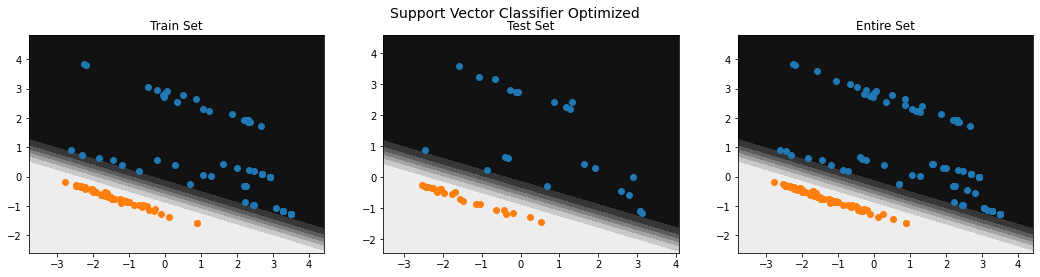

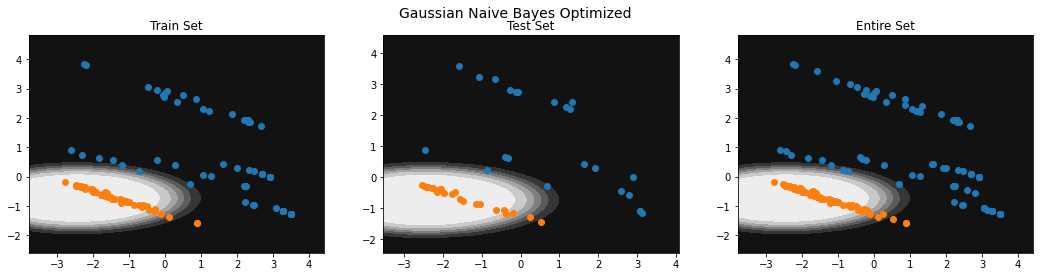

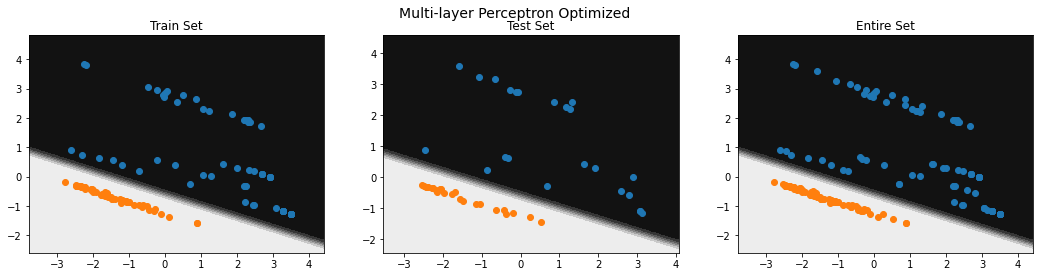

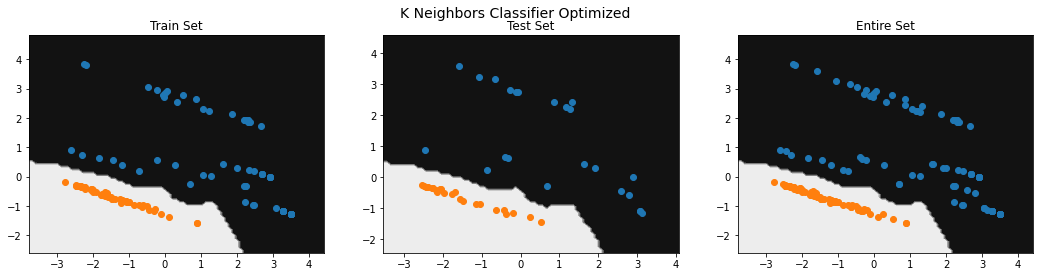

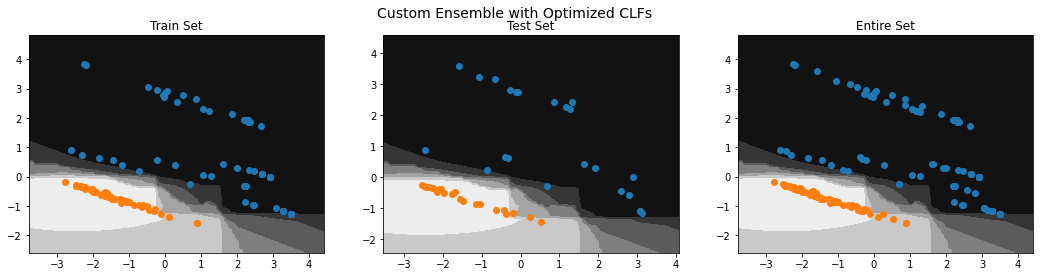

In [8]:
# Print decision surface for each Baseline model
data_set_tuples = [(pca_train_x, pca_train_y), (pca_test_x, pca_test_y), (x_part, y_part)]
show_probabilities = True
evaluate.print_decision_surface(trained_models_using_pca_comp, data_set_tuples, show_probabilities)